In [1]:
# import the libraries
import numpy as np
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [2]:
# load dataset

data = np.load("mnist.npz")
x_train_origin = data['x_train']
y_train_origin = data['y_train']
x_test_origin  = data['x_test']
y_test_origin  = data['y_test']

print('X Train shape: ', x_train_origin.shape)
print('Y Train shape: ', y_train_origin.shape)
print('X Test shape:  ', x_test_origin.shape)
print('Y Test shape:  ', y_test_origin.shape)

X Train shape:  (60000, 28, 28)
Y Train shape:  (60000,)
X Test shape:   (10000, 28, 28)
Y Test shape:   (10000,)


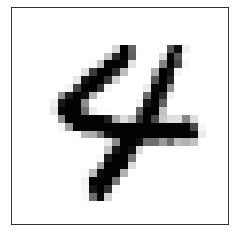

Number is =  4


In [3]:
import matplotlib.pyplot as plt
import random

i = random.randint(0,60000)
plt.imshow(x_train_origin[i], cmap='Greys')
plt.xticks(())
plt.yticks(())
plt.show()
print("Number is = ", y_train_origin[i])

In [4]:
batch_size = 128
num_classes = 10
epochs = 10

In [5]:
# preprocess the data

x_train = x_train_origin.reshape(x_train_origin.shape[0], 28, 28, 1)
x_test  = x_test_origin.reshape(x_test_origin.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

y_train = keras.utils.to_categorical(y_train_origin, num_classes)
y_test  = keras.utils.to_categorical(y_test_origin, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test  /= 255

print('X Train shape: ', x_train.shape)
print('X test shape: ', x_test.shape)
print('Train Samples: ', x_train.shape[0])
print('Test Samples:  ', x_test.shape[0])

X Train shape:  (60000, 28, 28, 1)
X test shape:  (10000, 28, 28, 1)
Train Samples:  60000
Test Samples:   10000


In [6]:
# create model

model = Sequential()
model.add(Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(28,  28,  1)))
model.add(Conv2D(10,  3, activation="relu"))
model.add(MaxPooling2D())
model.add(Conv2D(10,  3, activation="relu"))
model.add(Conv2D(10,  3, activation="relu"))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(10, activation="softmax"))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [7]:
# train the model

hist = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, verbose = 1, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 40s 83ms/step - loss: 0.5228 - accuracy: 0.8359 - val_loss: 0.1478 - val_accuracy: 0.9552
Epoch 2/10
469/469 [==============================] - 40s 86ms/step - loss: 0.1316 - accuracy: 0.9606 - val_loss: 0.0949 - val_accuracy: 0.9692
Epoch 3/10
469/469 [==============================] - 40s 86ms/step - loss: 0.0973 - accuracy: 0.9708 - val_loss: 0.0716 - val_accuracy: 0.9791
Epoch 4/10
469/469 [==============================] - 39s 83ms/step - loss: 0.0793 - accuracy: 0.9762 - val_loss: 0.0541 - val_accuracy: 0.9823
Epoch 5/10
469/469 [==============================] - 39s 83ms/step - loss: 0.0693 - accuracy: 0.9789 - val_loss: 0.0494 - val_accuracy: 0.9838
Epoch 6/10
469/469 [==============================] - 39s 82ms/step - loss: 0.0622 - accuracy: 0.9808 - val_loss: 0.0506 - val_accuracy: 0.9839
Epoch 7/10
469/469 [==============================] - 42s 89ms/step - loss: 0.0560 - accuracy: 0.9825 - val_loss: 0.0445 - val_accuracy:

In [8]:
# save model
model.save('mnist.h5')

In [9]:
# evaluate model

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03836173564195633
Test accuracy: 0.9883999824523926


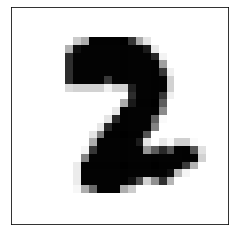

Model prediction is:  2


In [10]:
i = random.randint(0,10000)
plt.imshow(x_test[i], cmap='Greys')
plt.xticks(())
plt.yticks(())
plt.show()
print('Model prediction is: ', np.argmax(model.predict(x_test[i].reshape(1,28,28,1))))

## GUI for Model

In [11]:
# import the libraries

from keras.models import load_model
from tkinter import *
import tkinter as tk
import win32gui
from PIL import ImageGrab, Image
import numpy as np

In [12]:
# load model
model = load_model('mnist.h5')

In [13]:
# create gui
def predict_digit(img):

    img = img.resize((28,28))

    img = img.convert('L')
    img = np.array(img)

    img = img.reshape(1,28,28,1)
    img = img/255.0

    res = model.predict([img])[0]
    return np.argmax(res), max(res)

class App(tk.Tk):
    def __init__(self):
        tk.Tk.__init__(self)

        self.x = self.y = 0
        
        self.canvas = tk.Canvas(self, width=300, height=300, bg = "white", cursor="cross")
        self.label = tk.Label(self, text="Draw..", font=("Helvetica", 48))
        self.classify_btn = tk.Button(self, text = "Recognise", command = self.classify_handwriting)   
        self.button_clear = tk.Button(self, text = "Clear", command = self.clear_all)
       
        self.canvas.grid(row=0, column=0, pady=2, sticky=W, )
        self.label.grid(row=0, column=1,pady=2, padx=2)
        self.classify_btn.grid(row=1, column=1, pady=2, padx=2)
        self.button_clear.grid(row=1, column=0, pady=2)
        
        self.canvas.bind("<B1-Motion>", self.draw_lines)

    def clear_all(self):
        self.canvas.delete("all")
        
    def classify_handwriting(self):
        HWND = self.canvas.winfo_id()
        rect = win32gui.GetWindowRect(HWND)
        a,b,c,d = rect
        rect=(a+4,b+4,c-4,d-4)
        im = ImageGrab.grab(rect)

        digit, acc = predict_digit(im)
        self.label.configure(text= str(digit)+', '+ str(int(acc*100))+'%')

    def draw_lines(self, event):
        self.x = event.x
        self.y = event.y
        r=8
        self.canvas.create_oval(self.x-r, self.y-r, self.x + r, self.y + r, fill='black')


In [14]:
# run app

app = App()
mainloop()